In [2]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import NMF

torch.set_default_tensor_type(torch.DoubleTensor)

In [3]:
w = 320
h = 180
#w=640
#h=360

In [4]:
"""
if(True):
    count = 0
    videoFile = "./Videos/nature_video.mp4"
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    #print(frameRate)
    #rameRate = 5
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        frame = cv2.resize(frame, (w,h))
        if (frameId % math.floor(frameRate) == 0):
            filename ="Images/frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    print ("Done!")
"""


'\nif(True):\n    count = 0\n    videoFile = "./Videos/nature_video.mp4"\n    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path\n    frameRate = cap.get(5) #frame rate\n    #print(frameRate)\n    #rameRate = 5\n    x=1\n    while(cap.isOpened()):\n        frameId = cap.get(1) #current frame number\n        ret, frame = cap.read()\n        if (ret != True):\n            break\n        frame = cv2.resize(frame, (w,h))\n        if (frameId % math.floor(frameRate) == 0):\n            filename ="Images/frame%d.jpg" % count;count+=1\n            cv2.imwrite(filename, frame)\n    cap.release()\n    print ("Done!")\n'

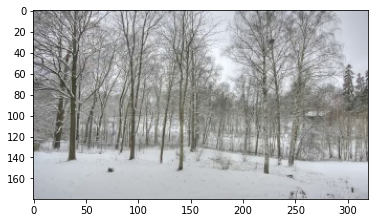

In [5]:
img = plt.imread('Images/frame0.jpg')   # reading image using its name
plt.imshow(img)

In [6]:
n = 36
X = np.zeros((n,h,w,3))

for i in range(n):
    im = plt.imread('Images/frame' + str(i) + '.jpg')
    X[i,:,:,:] = im

In [7]:
X = X.reshape((n, -1,3)).transpose((0,2,1))

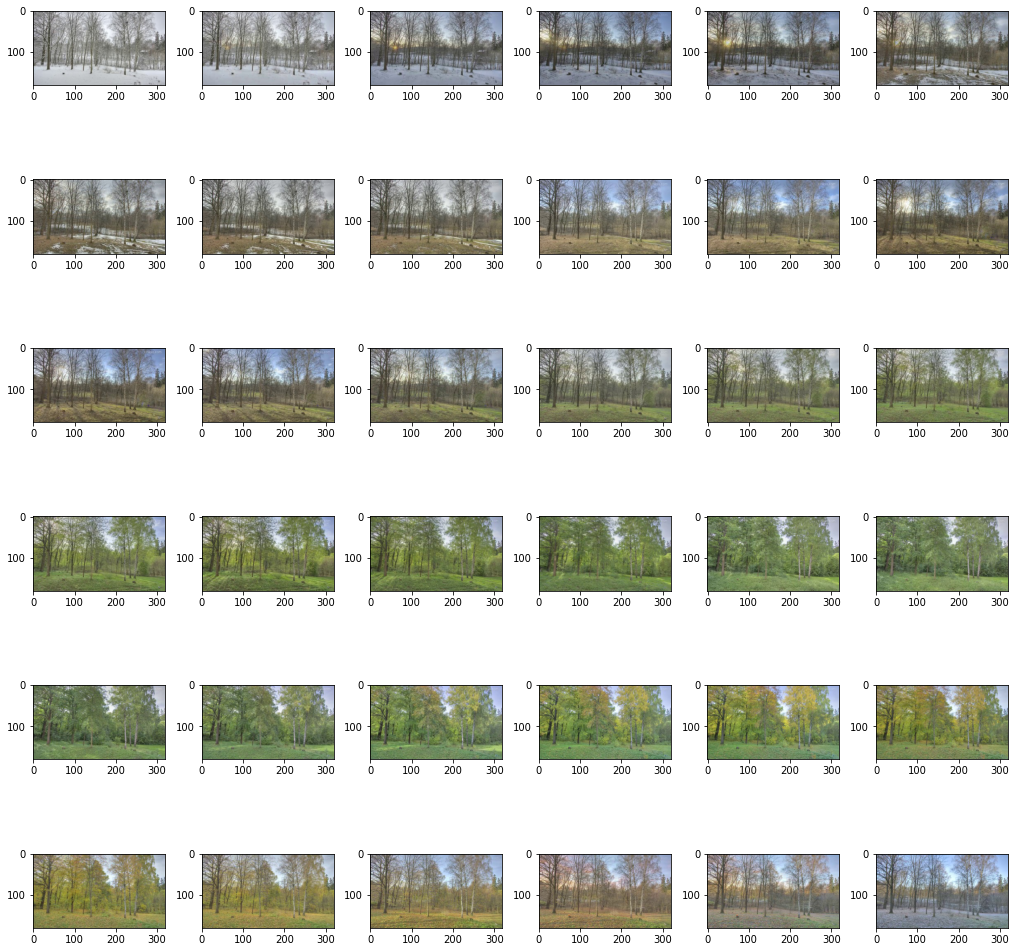

In [8]:
X_int = X.astype(int)
fig, axs = plt.subplots(6, 6, constrained_layout=True, figsize=(14,14))

for i in range(36):
    axs[int(i/6),i%6].imshow(X_int[i].reshape((3,h,w)).transpose((1,2,0)))

In [9]:
Hs = []
Ws = []
for j in range(3):
    r = 3
    model = NMF(n_components=r, init='random', random_state=0)
    W = model.fit_transform(X[:,j].T)
    H = model.components_
    W = W.reshape((180, 320, -1))
    if(j == 2):
        W = W[:,:,[1,0,2]]
        H = H[[1,0,2]]
    Hs.append(H)
    Ws.append(W)

/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


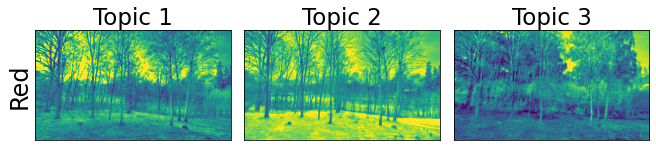

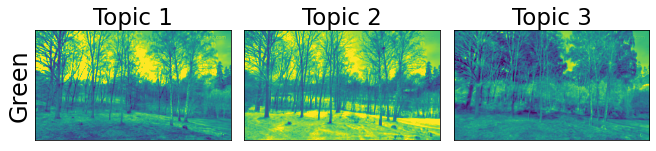

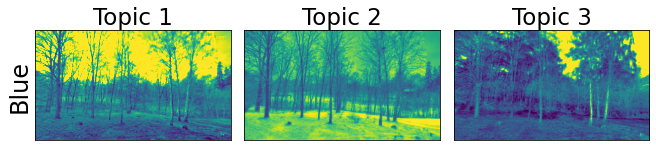

In [38]:
colors = ["Red", "Green", "Blue"]
vmin = 0
vmax = 13
r = 3
for j in range(3):
    fig, axs = plt.subplots(1, r, constrained_layout=True, figsize=(9,9))
    axs[0].set_ylabel(colors[j], fontsize=24)
    for i in range(r):
        axs[i].set_title('Topic ' + str(i+1), fontsize=23)
        axs[i].axes.xaxis.set_ticks([])
        axs[i].axes.yaxis.set_ticks([])
        axs[i].imshow(Ws[j][:,:,i], vmin=vmin, vmax=vmax)
    plt.show()

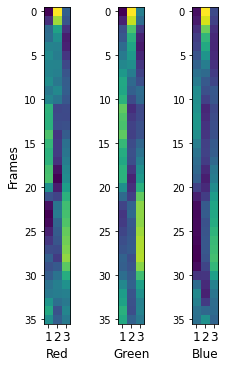

In [11]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(3.3,5))
axs[0].set_ylabel("Frames", fontsize=12)
for i in range(3):
    plt.sca(axs[i])
    plt.xticks(range(3), range(1,4), fontsize=12)
    axs[i].set_xlabel(colors[i], fontsize=12)
    axs[i].imshow(Hs[i].T)

In [32]:
Hs = []
Ws = []
for j in range(3):
    r = 4
    model = NMF(n_components=r, init='random', random_state=2)
    W = model.fit_transform(X[:,j].T)
    H = model.components_
    W = W.reshape((180, 320, -1))
    if(j == 2):
        W = W[:,:,[2,1,0,3]]
        H = H[[2,1,0,3]]
    Hs.append(H)
    Ws.append(W)

/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/jvendrow/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


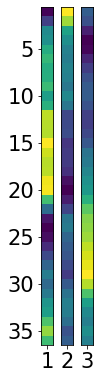

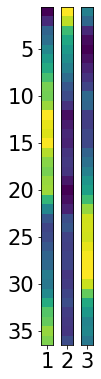

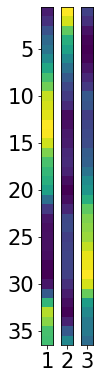

In [53]:
for j in range(3):
    fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(1.25,6.3))
    color = "viridis"
    #if(j == 0):
    #    fig.text(-0.24, 0.55, 'Frames', va='center', rotation='vertical', fontsize=15)
    for i in range(3):
        plt.sca(axs[i])
        plt.xticks(range(1), range(i+1,i+2), fontsize=21)
        plt.yticks(fontsize=10)
        if(i>0):
            axs[i].axes.yaxis.set_ticks([])
        else:
            plt.yticks([4,9,14,19,24,29,34], [5,10,15,20,25,30,35], fontsize=21)
        axs[i].imshow(Hs[j][[i]].T, cmap=plt.get_cmap(color))
        
            
        ratio = 28
        ax = axs[i]
        xleft, xright = ax.get_xlim()
        ybottom, ytop = ax.get_ylim()
        ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    #plt.xlabel(colors[i], fontsize=12)
    #fig.text(0.63, 1.03, colors[j], ha='center', fontsize=21)
    plt.show()

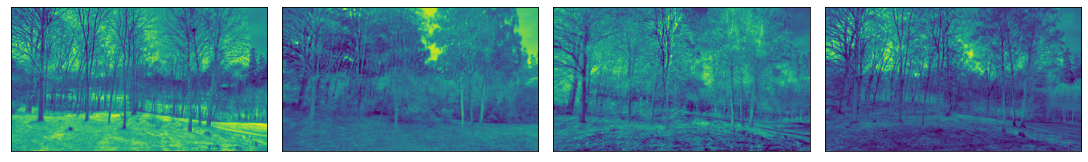

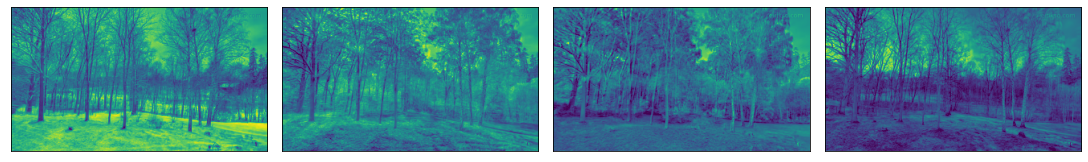

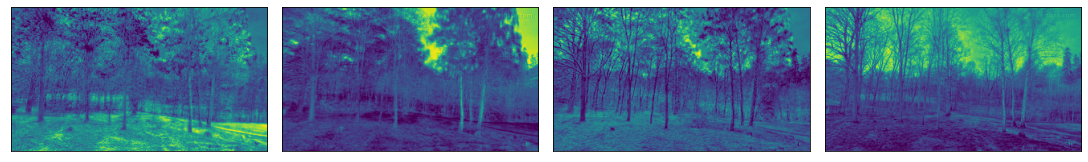

In [33]:
r = 4
for j in range(3):
    fig, axs = plt.subplots(1, r, constrained_layout=True, figsize=(15,15))
    for i in range(r):
        axs[i].axes.xaxis.set_ticks([])
        axs[i].axes.yaxis.set_ticks([])
        axs[i].imshow(Ws[j][:,:,i])
    plt.show()

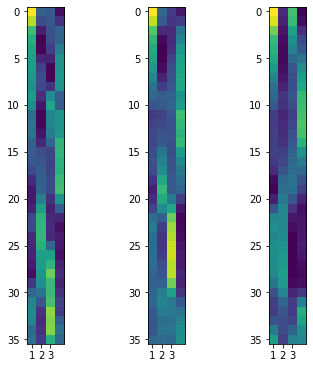

In [34]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(5,5))
for i in range(3):
    plt.sca(axs[i])
    plt.xticks(range(3), range(1,4))
    axs[i].imshow(Hs[i].T)

In [ ]:
"""
results = {}
results['A'] = A
results['B'] = B
results['C'] = C
np.save("factors_video_rank8", results)
"""
results = np.load("factors_video_rank8.npy", allow_pickle=True).item()
A = results['A']
B = results['B'] 
C = results['C'] 

In [ ]:
fig, axs = plt.subplots(r, 1, constrained_layout=True, figsize=(9,15))
for i in range(r):
    axs[i].imshow(C[:,i].reshape(h,w)*70)

In [ ]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(7,7))
#color = "binary"
color = "viridis"
axs[0].imshow(A, cmap=plt.get_cmap(color))
axs[1].imshow(B, cmap=plt.get_cmap(color))
axs[2].imshow(A @ B.T, cmap=plt.get_cmap(color))
plt.show()

In [ ]:
fig, axs = plt.subplots(6, 6, constrained_layout=True, figsize=(14,14))

for i in range(36):
    axs[int(i/6),i%6].imshow(X_approx[i].astype(int).reshape((3,h,w)).transpose((1,2,0)))

In [ ]:
X_tens = torch.tensor(X)

In [ ]:
r=8
n1,n2,n3 = X_tens.shape
net = NNCPD([n1,6,3],[n2,6,3],[n3,6,3])
#loss_func = Recon_Loss()
#loss_func = Recon_Loss_Straight()
loss_func = Energy_Loss_Tensor()
X_input = X_tens#*1000
history_unsupervised = train_unsupervised(net, X_input, loss_func, r, epoch = 1220, lr1 = 0, lr2 = 0.04, weight_decay=0.996, A=A, B=B,C=C)
np.save("history_video_rank8_6_3_1220_iters", history_unsupervised.tensor_dict)

In [ ]:
history_unsupervised.plot_scalar('loss')

In [ ]:
#np.save("history_video_rank8_6_3_800_iters", history_unsupervised.tensor_dict)
X_1 = history_unsupervised.get('A_X1')[-1]
X_2 = history_unsupervised.get('B_X1')[-1]
X_3 = history_unsupervised.get('C_X1')[-1]

A_A1 = history_unsupervised.get('A_A1')[-1]
A_S1 = history_unsupervised.get('A_S1')[-1]
B_A1 = history_unsupervised.get('B_A1')[-1]
B_S1 = history_unsupervised.get('B_S1')[-1]
C_A1 = history_unsupervised.get('C_A1')[-1]
C_S1 = history_unsupervised.get('C_S1')[-1]

A_A2 = history_unsupervised.get('A_A2')[-1]
A_S2 = history_unsupervised.get('A_S2')[-1]
B_A2 = history_unsupervised.get('B_A2')[-1]
B_S2 = history_unsupervised.get('B_S2')[-1]
C_A2 = history_unsupervised.get('C_A2')[-1]
C_S2 = history_unsupervised.get('C_S2')[-1]

In [ ]:
fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize=(11,12))
for i in range(8):
    x = int(i/2)
    y = i%2
    axs[x][y].imshow(X_3[:,i].reshape(h,w)*70)
    axs[x][y].set_title("Topic #" + str(i+1))
    axs[x][y].axes.xaxis.set_ticks([])
    axs[x][y].axes.yaxis.set_ticks([])

In [ ]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11,7))
color = "viridis"

plt.sca(axs[1])
plt.xticks(range(8), range(1,9))
plt.yticks(range(3), ['Red', 'Green', 'Blue'])

axs[0].imshow(X_1, cmap=plt.get_cmap(color))
axs[1].imshow(X_2, cmap=plt.get_cmap(color))
axs[2].imshow(X_1 @ X_2.T, cmap=plt.get_cmap(color))


In [ ]:
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(11,10))
for i in range(6):
    x = int(i/2)
    y = i%2
    axs[x][y].imshow(C_A1[:,i].reshape(h,w)*70)
    axs[x][y].set_title("Topic #" + str(i+1))
    #plt.sca(axs[x][y])
    axs[x][y].axes.xaxis.set_ticks([])
    axs[x][y].axes.yaxis.set_ticks([])
    #plt.xticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'])

In [ ]:
if(False):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12,7))
    color = "viridis"

    plt.sca(axs[1])
    plt.xticks(range(6), range(1,7))
    plt.yticks(range(3), ['Red', 'Green', 'Blue'])
    axs[0].imshow(A_A1, cmap=plt.get_cmap(color))
    axs[1].imshow(B_A1, cmap=plt.get_cmap(color))

In [ ]:
weight = weights_H(A_A1, B_A1, C_A1, A_S1, B_S1, C_S1)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(9,7))
color = "viridis"

A_A1_new = A_A1 @ weight[:,:,0].T 
B_A1_new = B_A1 @ weight[:,:,1].T
print(B_A1_new)
#print((w[:,:,1] / np.sum(w[:,:,1])))

plt.sca(axs[1])
plt.xticks(range(6), range(1,7))
plt.yticks(range(3), ['Red', 'Green', 'Blue'])

axs[0].imshow(A_A1_new, cmap=plt.get_cmap(color))
axs[1].imshow(B_A1_new, cmap=plt.get_cmap(color))
axs[2].imshow(A_A1_new @ B_A1_new.T, cmap=plt.get_cmap(color))
plt.show()

In [ ]:
weight = weights_H_sqrt(A_A1, B_A1, C_A1, A_S1, B_S1, C_S1)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(9,7))
color = "viridis"

A_A1_new = A_A1 @ weight[:,:,0].T 
B_A1_new = B_A1 @ weight[:,:,1].T
print(B_A1_new)
#print((w[:,:,1] / np.sum(w[:,:,1])))

plt.sca(axs[1])
plt.xticks(range(6), range(1,7))
plt.yticks(range(3), ['Red', 'Green', 'Blue'])

axs[0].imshow(A_A1_new, cmap=plt.get_cmap(color))
axs[1].imshow(B_A1_new, cmap=plt.get_cmap(color))
axs[2].imshow(A_A1_new @ B_A1_new.T, cmap=plt.get_cmap(color))
plt.show()

In [ ]:
C2 = torch.mm(C_A1, C_A2)
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(7,12))
for i in range(3):
    axs[i].axes.xaxis.set_ticks([])
    axs[i].axes.yaxis.set_ticks([])
    axs[i].imshow(C2[:,i].reshape(h,w)*70)

In [ ]:
if(False):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12,5))
    color = "viridis"

    A2 = torch.mm(A_A1,A_A2)
    B2 = torch.mm(B_A1,B_A2)
    axs[0].imshow(A2, cmap=plt.get_cmap(color))
    axs[1].imshow(B2, cmap=plt.get_cmap(color))

In [ ]:
weight = weights_H(A2, B2, C2, A_S2, B_S2, C_S2)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(8,6))
color = "viridis"

#A2_new = A2 @ np.sqrt(weight[:,:,0].T)
#B2_new = B2 @ np.sqrt(weight[:,:,1].T)
A2_new = A2 @ weight[:,:,0].T
B2_new = B2 @ weight[:,:,1].T
print(B2_new)
#print((w[:,:,1] / np.sum(w[:,:,1])))

plt.sca(axs[1])
plt.xticks(range(3), range(1,4))
plt.yticks(range(3), ['Red', 'Green', 'Blue'])

axs[0].imshow(A2_new, cmap=plt.get_cmap(color))
axs[1].imshow(B2_new, cmap=plt.get_cmap(color))
axs[2].imshow(A2_new @ B2_new.T, cmap=plt.get_cmap(color))
plt.show()

In [ ]:
weight = weights_H_sqrt(A2, B2, C2, A_S2, B_S2, C_S2)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(8,6))
color = "viridis"

#A2_new = A2 @ np.sqrt(weight[:,:,0].T)
#B2_new = B2 @ np.sqrt(weight[:,:,1].T)
A2_new = A2 @ weight[:,:,0].T
B2_new = B2 @ weight[:,:,1].T
print(B2_new)
#print((w[:,:,1] / np.sum(w[:,:,1])))

plt.sca(axs[1])
plt.xticks(range(3), range(1,4))
plt.yticks(range(3), ['Red', 'Green', 'Blue'])

axs[0].imshow(A2_new, cmap=plt.get_cmap(color))
axs[1].imshow(B2_new, cmap=plt.get_cmap(color))
axs[2].imshow(A2_new @ B2_new.T, cmap=plt.get_cmap(color))
plt.show()

In [ ]:
approx_w = outer_product(A_A1_new, B_A1_new, C_A1)
approx_2 = outer_product(A_A1, B_A1, C_A1)
approx = outer_product(X_1, X_2, X_3)
print(torch.norm(X))
print(torch.norm(approx-X))
print(torch.norm(approx_w-X))
print(torch.norm(approx_2-X))

In [ ]:
X_approx = outer_product(torch.mm(A_A1,A_S1), torch.mm(B_A1,B_S1), torch.mm(C_A1,C_S1)).numpy().astype(int)
print(np.max(X_approx[1]))
fig, axs = plt.subplots(6, 6, constrained_layout=True, figsize=(14,14))
for i in range(36):
    temp = X_approx[i].reshape((3,h,w)).transpose((1,2,0))
    axs[int(i/6),i%6].imshow(temp)

In [ ]:
def weights_H_sqrt(A, B, C, H_A, H_B, H_C):
    
    alphas = []
    n_1, r = A.shape
    n_2, r = B.shape
    n_3, r = C.shape
    weights = torch.zeros((r, r, 2))
    
    
    for col in range(r):
        for it in range(r**2):
            i = int(it % r)
            j = int((it/r) % r)

            weights[col, i, 0] += torch.sqrt(torch.sum(H_A[i] * H_B[j] * H_C[col]))
            weights[col, j, 1] += torch.sqrt(torch.sum(H_A[i] * H_B[j] * H_C[col]))
            #weights[col, i, 0] += torch.sum(H_A[i] * H_B[j] * H_C[col])
            #weights[col, j, 1] += torch.sum(H_A[i] * H_B[j] * H_C[col])
         


    return weights

In [ ]:
def intro_product(A, B, C, H_A, H_B, H_C, get_alpha=False):
    
    alphas = []
    n_1, r = A.shape
    n_2, r = B.shape
    n_3, r = C.shape
    X_approx = torch.zeros((n_1,n_2,n_3))
    
    
    for it in range(r**3):
        i = int(it % r)
        j = int((it/r) % r)
        k = int((it/(r**2) % r))
        
        alpha = torch.sum(H_A[i] * H_B[j] * H_C[k]);
        alphas.append(alpha)
        X_approx += alpha * torch.einsum('p, qr->pqr',A[:,i],torch.ger(B[:,j],C[:,k]))
         
    if get_alpha:
        return X_approx, alphas
    else:
         return X_approx

In [ ]:
A = A_A1
B = B_A1
C = C_A1
_, alphas = intro_product(A_A1, B_A1, C_A1, A_S1, B_S1, C_S1)
true_outer = outer_product(A,B,C)

n_1, r = A.shape
n_2, r = B.shape
n_3, r = C.shape
X_approx = torch.zeros((n_1,n_2,n_3))

X_approx += A_S1[1] 

In [ ]:
A = torch.rand((10,4))
B = torch.rand((10,4))
C = torch.rand((10,4))

H1 = torch.rand((4,8))
H2 = torch.rand((4,8))
H3 = torch.rand((4,8))

In [ ]:
test = intro_product(A,B,C,H1,H2,H3).numpy().reshape((-1,10))

In [ ]:
np.linalg.matrix_rank(test)

In [ ]:
A = torch.rand((3,2))
B = torch.rand((3,2))
C = torch.rand((3,2))

r = 2
X_approx = torch.zeros((3,3,3))


for it in range(r**3):
    i = int(it % r)
    j = int((it/r) % r)
    k = int((it/(r**2) % r))

    alpha = np.random.rand()#torch.sum(H_A[i] * H_B[j] * H_C[k]);
    X_approx += alpha * torch.einsum('p, qr->pqr',A[:,i],torch.ger(B[:,j],C[:,k]))


In [ ]:
test = X_approx.numpy().reshape((-1,3))

In [ ]:
np.linalg.matrix_rank(test)

In [ ]:
print(test)

In [ ]:
from sklearn.decomposition import SparseCoder

In [ ]:
s = SparseCoder(test[:,[0,1]].T, transform_algorithm='lasso_lars', transform_alpha=0, positive_code=True)

In [ ]:
c = s.transform(test[:,[2]].T)

In [ ]:
c

In [ ]:
np.dot(test[:,[0,1]], c.T).T

In [ ]:
test[:,[0,1]]

In [ ]:
0.33357647 * 0.79 + 0.32527775 * 0.41

In [ ]:
0.24165182 * 0.79 + 0.22585734 * 0.41

In [ ]:
0.33357647/0.24165182

In [ ]:
0.32527775/0.22585734

In [ ]:
0.39822979/0.28013009

In [ ]:
"""
n_2, r = B.shape
n_3, r = C.shape
X_approx = torch.zeros((n_1,n_2,n_3))


for it in range(r**2):
    i = int(it % r)
    j = int((it/r) % r)

    x = torch.rand((n_1))#torch.sum(H_A[i] * H_B[j] * H_C[k]);
    X_approx += torch.einsum('p, qr->pqr',x,torch.ger(B[:,i],C[:,j]))
"""

In [ ]:
test = X_approx.numpy().reshape((-1,10))
np.linalg.matrix_rank(test)